In [ ]:
import pandas as pd
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
X = pd.read_csv('input_training.csv')
X.fillna(0, inplace=True)
X.sort_values(by="ID",inplace=True)
y = pd.read_csv(r'output\output_training_gmEd6Zt.csv')
train = pd.merge(X,y,on="ID").copy()
train.set_index("ID", inplace=True)
train

,day,equity,r0,r1,r2,r3,r4,r5,r6,r7,...,r44,r45,r46,r47,r48,r49,r50,r51,r52,reod
ID,,,,,,,,,,,,,,,,,,,,,
0,249,1488,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-68.03,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
1,272,107,-9.76,0.00,-12.21,46.44,34.08,0.00,41.24,12.08,...,-16.92,-4.84,4.84,0.00,7.26,-9.68,-19.38,9.71,26.68,0
2,323,1063,49.85,0.00,0.00,-26.64,-23.66,-22.14,49.12,53.61,...,1.59,6.37,-49.32,-9.59,-6.40,22.41,-6.39,7.99,15.96,-1
3,302,513,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,123,1465,-123.84,-115.18,-26.44,0.00,42.42,10.56,0.00,-47.57,...,-21.44,-21.48,10.78,-21.55,-5.40,-10.81,5.41,-32.47,43.43,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843294,297,123,3.96,0.00,-70.34,74.24,-0.56,0.00,-23.63,-9.57,...,1.71,0.00,-3.98,2.28,-21.62,-1.71,9.12,0.00,9.11,1
843295,16,1501,0.00,-183.49,-13.19,46.24,0.00,-39.60,13.25,0.00,...,6.62,0.00,19.85,0.00,-26.42,6.62,0.00,0.00,-19.88,-1
843296,166,1231,37.02,2.93,-3.67,16.89,-4.03,13.56,-4.39,-14.28,...,-3.28,-1.46,-3.65,-1.10,-13.51,2.92,-6.21,9.69,-3.66,0


In [6]:
X = pd.read_csv(r'input_test.csv')
X.fillna(0, inplace=True)
X.sort_values(by="ID",inplace=True)
y = pd.read_csv(r"output\output_test_random.csv")
test = pd.merge(X,y,on="ID").copy()
test.set_index("ID", inplace=True)
test

,day,equity,r0,r1,r2,r3,r4,r5,r6,r7,...,r44,r45,r46,r47,r48,r49,r50,r51,r52,reod
ID,,,,,,,,,,,,,,,,,,,,,
1000000,1000384,1000064,79.19,-26.37,-167.18,103.46,-102.27,-198.02,13.77,-59.61,...,29.82,-29.69,77.57,23.75,82.94,-17.63,17.60,5.87,0.00,0
1000001,1000148,1000841,-321.77,-178.53,107.97,27.29,-64.54,-73.78,9.93,-26.50,...,1.53,32.08,-33.50,-21.41,43.89,68.07,-23.20,-13.14,-82.95,1
1000002,1000441,1000380,-51.95,-19.58,-26.16,-26.28,-3.29,3.29,-46.11,16.55,...,-10.16,-40.68,13.61,3.40,6.80,10.20,0.00,-10.19,-6.80,1
1000003,1000059,1001843,-169.49,9.57,-76.48,28.90,0.00,-19.21,105.87,-9.52,...,-9.72,-9.73,-9.74,29.24,-29.18,34.15,14.58,-29.13,4.87,-1
1000004,1000336,1001783,-46.19,32.17,-3.08,-32.06,11.75,27.81,-13.55,-30.21,...,-1.84,-1.23,1.23,5.53,-7.37,1.84,1.23,0.61,-4.30,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885794,1000125,1001131,0.00,67.87,-67.41,-18.15,12.99,-42.80,29.96,35.06,...,5.09,-12.73,5.10,-8.91,-20.41,2.56,0.00,-7.67,6.40,-1
1885795,1000314,1000333,76.29,-65.02,2.73,-24.54,-17.78,13.70,-19.17,24.70,...,-1.36,-13.65,0.00,0.00,-4.10,-2.73,10.94,10.93,8.18,1
1885796,1000247,1000348,-73.66,37.11,-7.92,-7.93,0.00,-18.49,-26.46,13.27,...,10.63,5.31,-10.61,0.00,13.28,-5.31,6.64,7.96,5.30,-1


In [ ]:
X_train = train.drop(columns=["reod"])
y_train = train["reod"]
X_test = test.drop(columns=["reod"])
y_test = test["reod"]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

c:\Users\rabhi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 21s 971us/step - accuracy: 0.4118 - loss: -452.6877 - val_accuracy: 0.4137 - val_loss: -7072.1079
Epoch 2/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - accuracy: 0.4119 - loss: -14964.4561 - val_accuracy: 0.4138 - val_loss: -49779.1758
Epoch 3/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - accuracy: 0.4126 - loss: -71030.5859 - val_accuracy: 0.4137 - val_loss: -158226.6094
Epoch 4/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - accuracy: 0.4120 - loss: -202229.2812 - val_accuracy: 0.4139 - val_loss: -362174.7500
Epoch 5/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 21s 998us/step - accuracy: 0.4128 - loss: -434963.7812 - val_accuracy: 0.4147 - val_loss: -690621.5625
Epoch 6/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - accuracy: 0.4126 - loss: -809043.5625 - val_accuracy: 0.4137 - val_loss: -1173467.0000
Epoch 7/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - accuracy: 0.4125 - loss: -1276120.8750 - val_accuracy: 0.4139 - val_loss: 

In [22]:
input_dim = X_train.shape[1]
encoding_dim = 32

input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)

encoder = Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.2)

X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

model = Sequential([
    Dense(128, input_dim=X_train_encoded.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_encoded, y_train, epochs=50, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test_encoded, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - loss: 0.8425 - val_loss: 0.7652
Epoch 2/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 0.7960 - val_loss: 0.7624
Epoch 3/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 0.8010 - val_loss: 0.7577
Epoch 4/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 0.8110 - val_loss: 0.7561
Epoch 5/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 0.7783 - val_loss: 0.7557
Epoch 6/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - loss: 0.8249 - val_loss: 0.7569
Epoch 7/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 0.8549 - val_loss: 0.7494
Epoch 8/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - loss: 0.7923 - val_loss: 0.7487
Epoch 9/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 0.8049 - val_loss: 0.7485
Epoch 10/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 0.8097 - val_loss: 0.7470
Epoch 11/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 0.7704 - val_loss: 0.79

c:\Users\rabhi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21083/21083 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.4112 - loss: -34633.8594 - val_accuracy: 0.4135 - val_loss: -715911.8125
Epoch 2/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - accuracy: 0.4115 - loss: -921463.3125 - val_accuracy: 0.4135 - val_loss: -6152991.0000
Epoch 3/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - accuracy: 0.4115 - loss: -4381888.0000 - val_accuracy: 0.4135 - val_loss: -23227044.0000
Epoch 4/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - accuracy: 0.4121 - loss: -31889424.0000 - val_accuracy: 0.4135 - val_loss: -69139440.0000
Epoch 5/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 121s 6ms/step - accuracy: 0.4111 - loss: -116310040.0000 - val_accuracy: 0.4135 - val_loss: -150079264.0000
Epoch 6/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 138s 6ms/step - accuracy: 0.4105 - loss: -193050128.0000 - val_accuracy: 0.4135 - val_loss: -298042528.0000
Epoch 7/50
21083/21083 ━━━━━━━━━━━━━━━━━━━━ 116s 6ms/step - accuracy: 0.4112 - loss: -354766304.0000 - val_accuracy: 0.4

<Axes: title={'center': 'Distribution de y_test en pourcentage'}, xlabel='reod'>

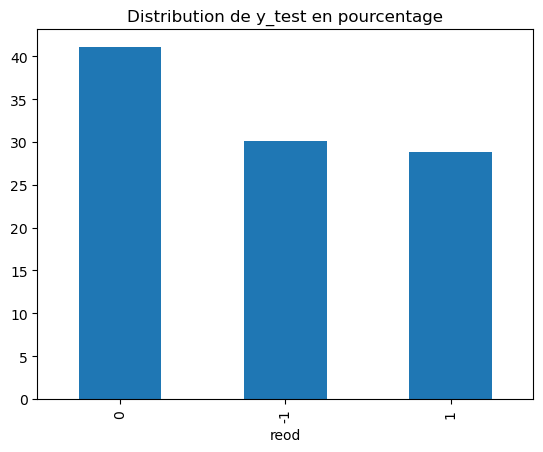

In [25]:
(y_test.value_counts(normalize=True) * 100).plot(kind='bar', title="Distribution de y_test en pourcentage")